In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
print(f'Number of Rows in Data {df.shape[0]}')

Number of Rows in Data 25


In [ ]:
print(f'Number of columns {df.shape[1]}')

Number of columns 2


In [ ]:
df.shape

(25, 2)

In [ ]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [ ]:
x=df.Hours
y=df.Scores

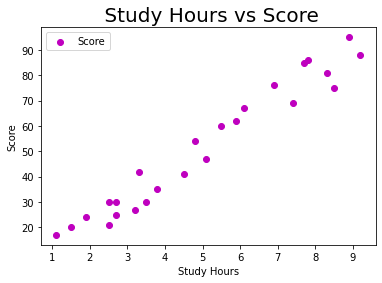

In [ ]:
plt.scatter(x,y,c='m',label='Score')
plt.title(" Study Hours vs Score", fontsize=20)
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

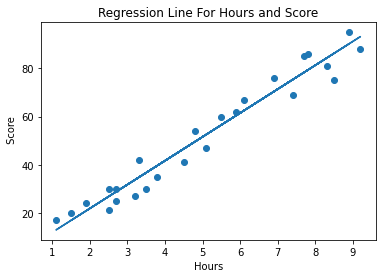

In [ ]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y)
plt.plot(x, line);
plt.title("Regression Line For Hours and Score")
plt.xlabel("Hours",fontsize=10)
plt.ylabel(" Score",fontsize=10)
plt.show()

In [ ]:
reg.score(x_train, y_train)

0.9515510725211553

In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


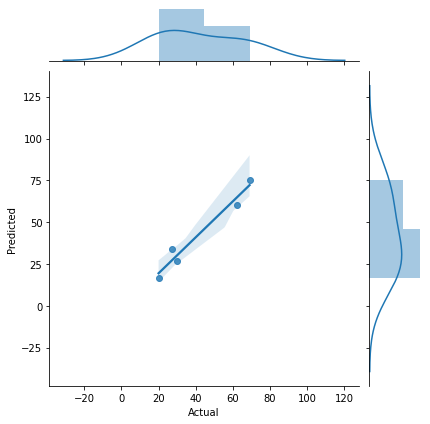

In [ ]:
sns.jointplot('Actual','Predicted',data=df_pred,kind='reg')

In [ ]:
hours=float(input())
pre_score=reg.predict([[9.25]])
print(f"No of Hour = {hours}")
print(f"Predicted Score = {pre_score[0]}")

9.25
No of Hour = 9.25
Predicted Score = 93.69173248737539


In [ ]:
from sklearn import metrics

In [ ]:

print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Square Error",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 4.183859899002982
Mean Square Error 21.598769307217456
Mean Absolute Error 4.183859899002982
Root Mean Squared Error 4.647447612100373
